# Лабораторная работа №5  
**Тема:** Моделирование сложной системы с помощью когнитивных карт  
**Дисциплина:** Системное моделирование  

---

## 1. Моделируемая система: "Устойчивое развитие города"
**Концепты (12 элементов):**  
1. `Население` (A)  
2. `Экономический_рост` (B)  
3. `Загрязнение_воздуха` (C)  
4. `Общественный_транспорт` (D)  
5. `Уровень_безработицы` (E)  
6. `Инвестиции_в_инфраструктуру` (F)  
7. `Здоровье_населения` (G)  
8. `Туристическая_привлекательность` (H)  
9. `Количество_автомобилей` (I)  
10. `Удовлетворенность_жизнью` (J)  
11. `Преступность` (K)  
12. `Бюджет_города` (L)  

---

## 2. Причинно-следственные связи (22 связи)
| Источник              | Цель                 | Знак | Обоснование |
|-----------------------|----------------------|------|-------------|
| Население (A)         | Экономический_рост (B) | +   | Рынок труда |
| Экономический_рост (B)| Загрязнение_воздуха (C) | +   | Промышленность |
| Экономический_рост (B)| Бюджет_города (L)    | +    | Налоги       |
| Бюджет_города (L)     | Инвестиции_в_инфраструктуру (F) | + | Финансирование |
| Инвестиции_в_инфраструктуру (F) | Общественный_транспорт (D) | + | Развитие сети |
| Общественный_транспорт (D) | Количество_автомобилей (I) | - | Альтернатива личному авто |
| Количество_автомобилей (I) | Загрязнение_воздуха (C) | + | Выхлопы      |
| Загрязнение_воздуха (C) | Здоровье_населения (G) | -   | Болезни      |
| Здоровье_населения (G) | Удовлетворенность_жизнью (J) | + | Качество жизни |
| Удовлетворенность_жизнью (J) | Туристическая_привлекательность (H) | + | Репутация |
| Туристическая_привлекательность (H) | Экономический_рост (B) | +   | Доходы от туризма |
| Экономический_рост (B) | Уровень_безработицы (E) | -   | Создание рабочих мест |
| Уровень_безработицы (E) | Преступность (K)     | +    | Социальная напряженность |
| Преступность (K)       | Туристическая_привлекательность (H) | - | Безопасность |
| Население (A)          | Бюджет_города (L)    | +    | Налоговая база |
| Здоровье_населения (G) | Экономический_рост (B) | +   | Производительность труда |
| Инвестиции_в_инфраструктуру (F) | Загрязнение_воздуха (C) | - | Экологические технологии |
| Бюджет_города (L)      | Здоровье_населения (G) | +   | Финансирование медицины |
| Удовлетворенность_жизнью (J) | Население (A)      | +    | Миграция     |
| Преступность (K)       | Удовлетворенность_жизнью (J) | - | Страх       |
| Экономический_рост (B) | Количество_автомобилей (I) | + | Покупка авто |
| Общественный_транспорт (D) | Удовлетворенность_жизнью (J) | + | Удобство |

---

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class CognitiveMap:
    def __init__(self):
        self.concepts = {}  # Словарь для хранения концептов
        self.connections = {}  # Словарь связей между концептами
        self.values = {}  # Текущие значения концептов

    def add_concept(self, name):
        """Добавляет концепт в карту."""
        if name not in self.concepts:
            self.concepts[name] = True
            self.connections[name] = {}
            self.values[name] = 0

    def add_connection(self, source, target, weight):
        """Добавляет причинно-следственную связь между концептами."""
        if source in self.concepts and target in self.concepts:
            self.connections[source][target] = weight
        else:
            raise ValueError("Концепт не найден")

    def visualize(self):
        """Визуализирует когнитивную карту с помощью графа."""
        G = nx.DiGraph()

        for concept in self.concepts:
            G.add_node(concept)

        for source in self.connections:
            for target, weight in self.connections[source].items():
                G.add_edge(source, target, label=weight)
                
        pos = nx.spring_layout(G)
        labels = nx.get_edge_attributes(G, 'label')
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, arrowsize=20)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.show()

    def simulate_impact(self, initial_changes, steps=5):
        """Симулирует распространение воздействия на заданное число шагов."""
        current_values = self.values.copy()

        for concept, value in initial_changes.items():
            if concept in current_values:
                current_values[concept] = value
            else:
                raise ValueError(f"Концепт {concept} не существует")

        history = [current_values.copy()]

        for _ in range(steps):
            new_values = current_values.copy()

            for source in self.connections:
                for target, weight in self.connections[source].items():
                    effect = current_values[source] * self._weight_to_value(weight)
                    new_values[target] += effect
            current_values = new_values.copy()
            history.append(current_values.copy())

        return history

    def _weight_to_value(self, weight):
        """Преобразует символьный вес в числовое значение."""
        if weight == '+':
            return 1
        elif weight == '-':
            return -1
        elif weight == '0':
            return 0
        else:
            raise ValueError("Недопустимый вес связи")

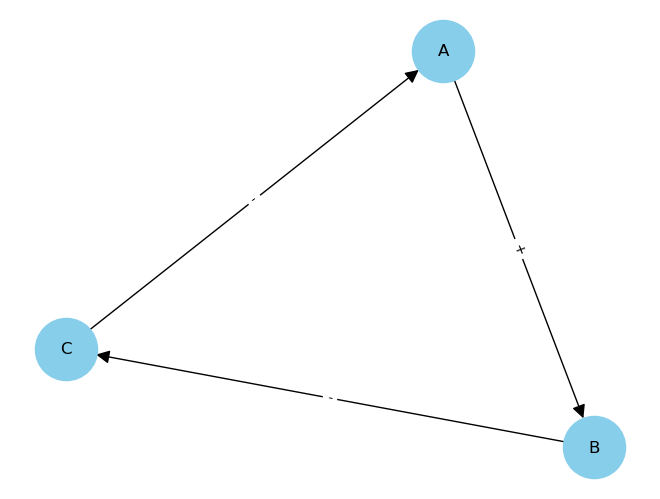

Шаг 0: {'A': 1, 'B': 0, 'C': 0}
Шаг 1: {'A': 1, 'B': 1, 'C': 0}
Шаг 2: {'A': 1, 'B': 2, 'C': -1}
Шаг 3: {'A': 2, 'B': 3, 'C': -3}


In [3]:
cm = CognitiveMap()
cm.add_concept("A")
cm.add_concept("B")
cm.add_concept("C")
cm.add_connection("A", "B", "+")
cm.add_connection("B", "C", "-")
cm.add_connection("C", "A", "-")

cm.visualize()

initial_changes = {"A": 1}
history = cm.simulate_impact(initial_changes, steps=3)

for step, values in enumerate(history):
    print(f"Шаг {step}: {values}")

In [4]:
class CityCognitiveMap:
    def __init__(self):
        self.concepts = {}
        self.connections = {}
        self.values = {}
        self.labels = {} 

    def add_concept(self, symbol, name=None):
        self.concepts[symbol] = True
        self.connections[symbol] = {}
        self.values[symbol] = 0
        self.labels[symbol] = name if name else symbol

    def add_connection(self, source, target, weight):
        if source in self.concepts and target in self.concepts:
            self.connections[source][target] = weight
        else:
            raise ValueError("Концепт не найден")

    def visualize(self):
        G = nx.DiGraph()
        labels = {k: f"{k}\n({v})" for k, v in self.labels.items() if v}
        
        for concept in self.concepts:
            G.add_node(concept)
        
        for source in self.connections:
            for target, weight in self.connections[source].items():
                G.add_edge(source, target, label=weight, 
                          color='green' if weight == '+' else 'red' if weight == '-' else 'gray')
        
        pos = nx.spring_layout(G, k=0.5, iterations=50)
        edge_colors = [G[u][v]['color'] for u, v in G.edges()]
        edge_labels = nx.get_edge_attributes(G, 'label')
        
        plt.figure(figsize=(20, 15))
        nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', 
               node_size=2500, edge_color=edge_colors, arrowsize=25,
               font_size=10, font_weight='bold')
        
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')
        plt.title("Когнитивная карта устойчивого развития города", size=15)
        plt.show()

    def simulate_impact(self, initial_changes, steps=5, damping=0.7):
        current_values = {k: 0 for k in self.concepts}
        for concept, value in initial_changes.items():
            if concept in current_values:
                current_values[concept] = value
        
        history = [current_values.copy()]
        
        for _ in range(steps):
            new_values = {k: v * damping for k, v in current_values.items()}  # Затухание
            for source in self.connections:
                for target, weight in self.connections[source].items():
                    effect = current_values[source] * self._weight_to_value(weight)
                    new_values[target] += effect
            current_values = new_values.copy()
            history.append(current_values.copy())
        
        return history

    def _weight_to_value(self, weight):
        if weight == '+': return 0.8
        elif weight == '-': return -0.8
        elif weight == '0': return 0
        else: raise ValueError("Недопустимый вес")

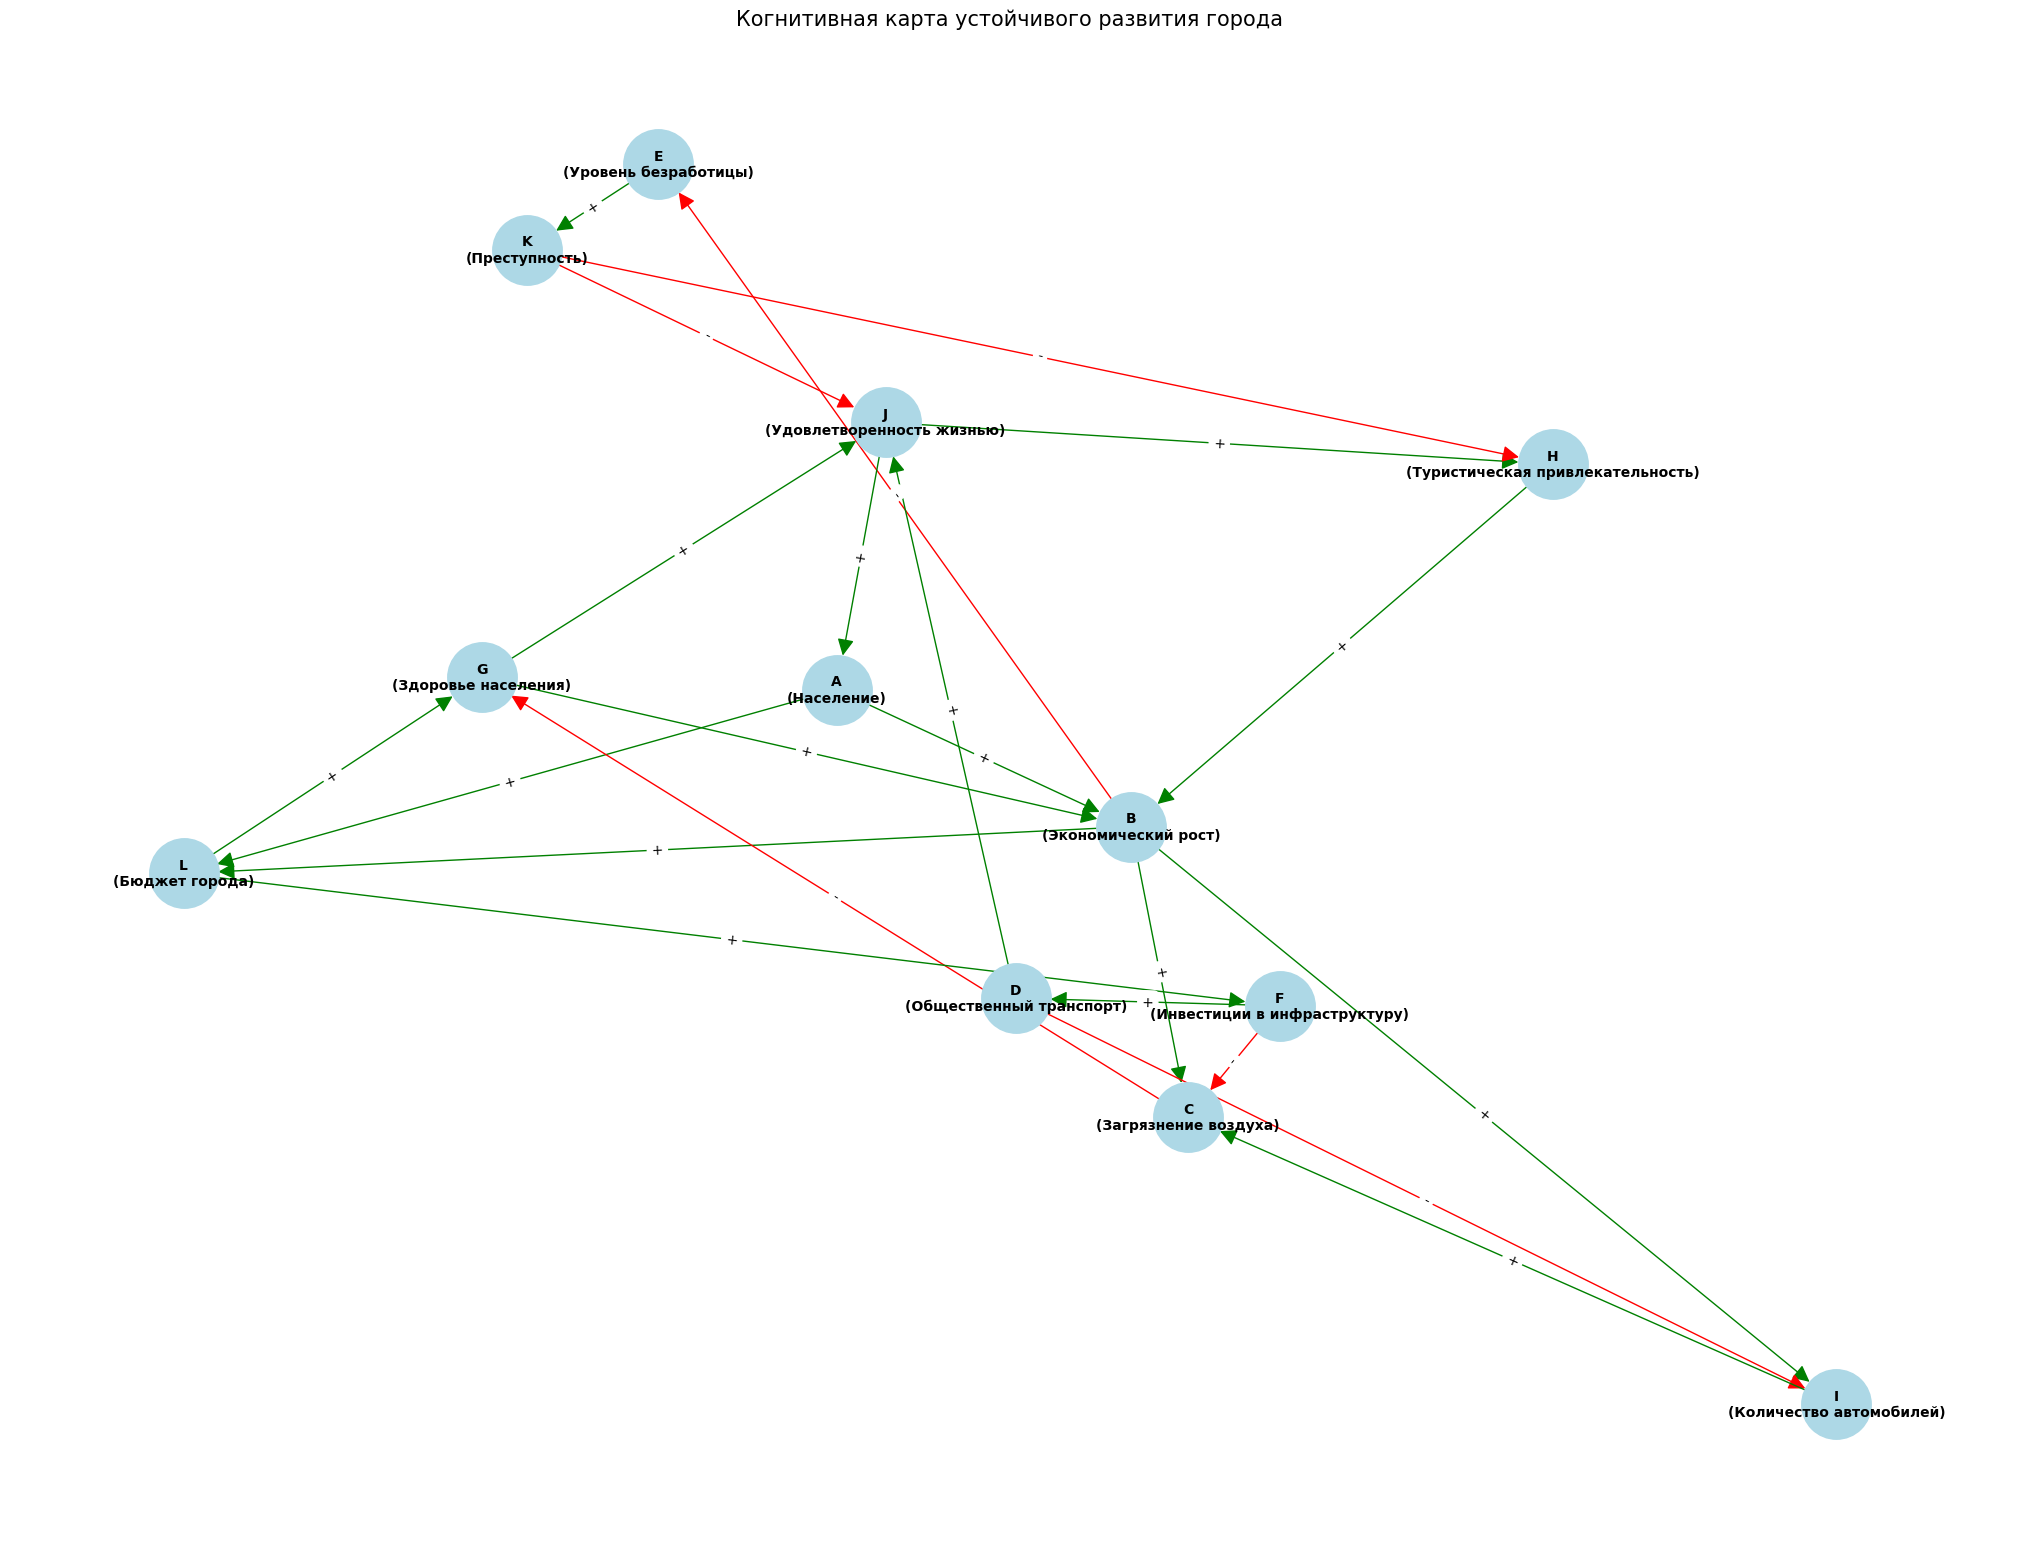


Динамика системы:
Шаг  A (Население)            B (Экономический рос     C (Загрязнение возду     D (Общественный тран     E (Уровень безработи     F (Инвестиции в инфр     G (Здоровье населени     H (Туристическая при     I (Количество автомо     J (Удовлетворенность     K (Преступность)         L (Бюджет города)        
0    1.500                    0.000                    0.000                    0.000                    0.000                    1.000                    0.000                    0.000                    0.000                    0.000                    0.000                    0.000                    
1    1.275                    1.200                    -0.800                   0.800                    0.000                    0.850                    0.000                    0.000                    0.000                    0.000                    0.000                    1.200                    
2    1.084                    2.040                    -0.400  

In [5]:
cm = CityCognitiveMap()

concepts = [
    ('A', 'Население'),
    ('B', 'Экономический рост'),
    ('C', 'Загрязнение воздуха'),
    ('D', 'Общественный транспорт'),
    ('E', 'Уровень безработицы'),
    ('F', 'Инвестиции в инфраструктуру'),
    ('G', 'Здоровье населения'),
    ('H', 'Туристическая привлекательность'),
    ('I', 'Количество автомобилей'),
    ('J', 'Удовлетворенность жизнью'),
    ('K', 'Преступность'),
    ('L', 'Бюджет города')
]

for symbol, name in concepts:
    cm.add_concept(symbol, name)

connections = [
    ('A', 'B', '+'), ('B', 'C', '+'), ('B', 'L', '+'),
    ('L', 'F', '+'), ('F', 'D', '+'), ('D', 'I', '-'),
    ('I', 'C', '+'), ('C', 'G', '-'), ('G', 'J', '+'),
    ('J', 'H', '+'), ('H', 'B', '+'), ('B', 'E', '-'),
    ('E', 'K', '+'), ('K', 'H', '-'), ('A', 'L', '+'),
    ('G', 'B', '+'), ('F', 'C', '-'), ('L', 'G', '+'),
    ('J', 'A', '+'), ('K', 'J', '-'), ('B', 'I', '+'),
    ('D', 'J', '+')
]

for src, tgt, sign in connections:
    cm.add_connection(src, tgt, sign)

cm.visualize()

history = cm.simulate_impact(
    initial_changes={'A': 1.5, 'F': 1.0},
    steps=10,
    damping=0.85
)

print("\nДинамика системы:")
headers = ["Шаг"] + [f"{symbol} ({cm.labels[symbol]})" for symbol in cm.concepts]
print("{:<5}".format("Шаг"), end="")
for h in headers[1:]:
    print("{:<25}".format(h[:20]), end="")
print()

for step, values in enumerate(history):
    print("{:<5}".format(step), end="")
    for symbol in cm.concepts:
        print("{:<25}".format(f"{values[symbol]:.3f}"), end="")
    print()

# Эксперименты с когнитивной картой "Устойчивое развитие города"

## Эксперимент 1: Эффект массовых инвестиций в инфраструктуру
**Гипотеза:** Увеличение инвестиций в инфраструктуру на 50% снизит загрязнение воздуха и улучшит здоровье населения через 5 шагов.

**Параметры:**
```python
initial_changes = {'F': 1.5}  # Высокие инвестиции
steps = 8

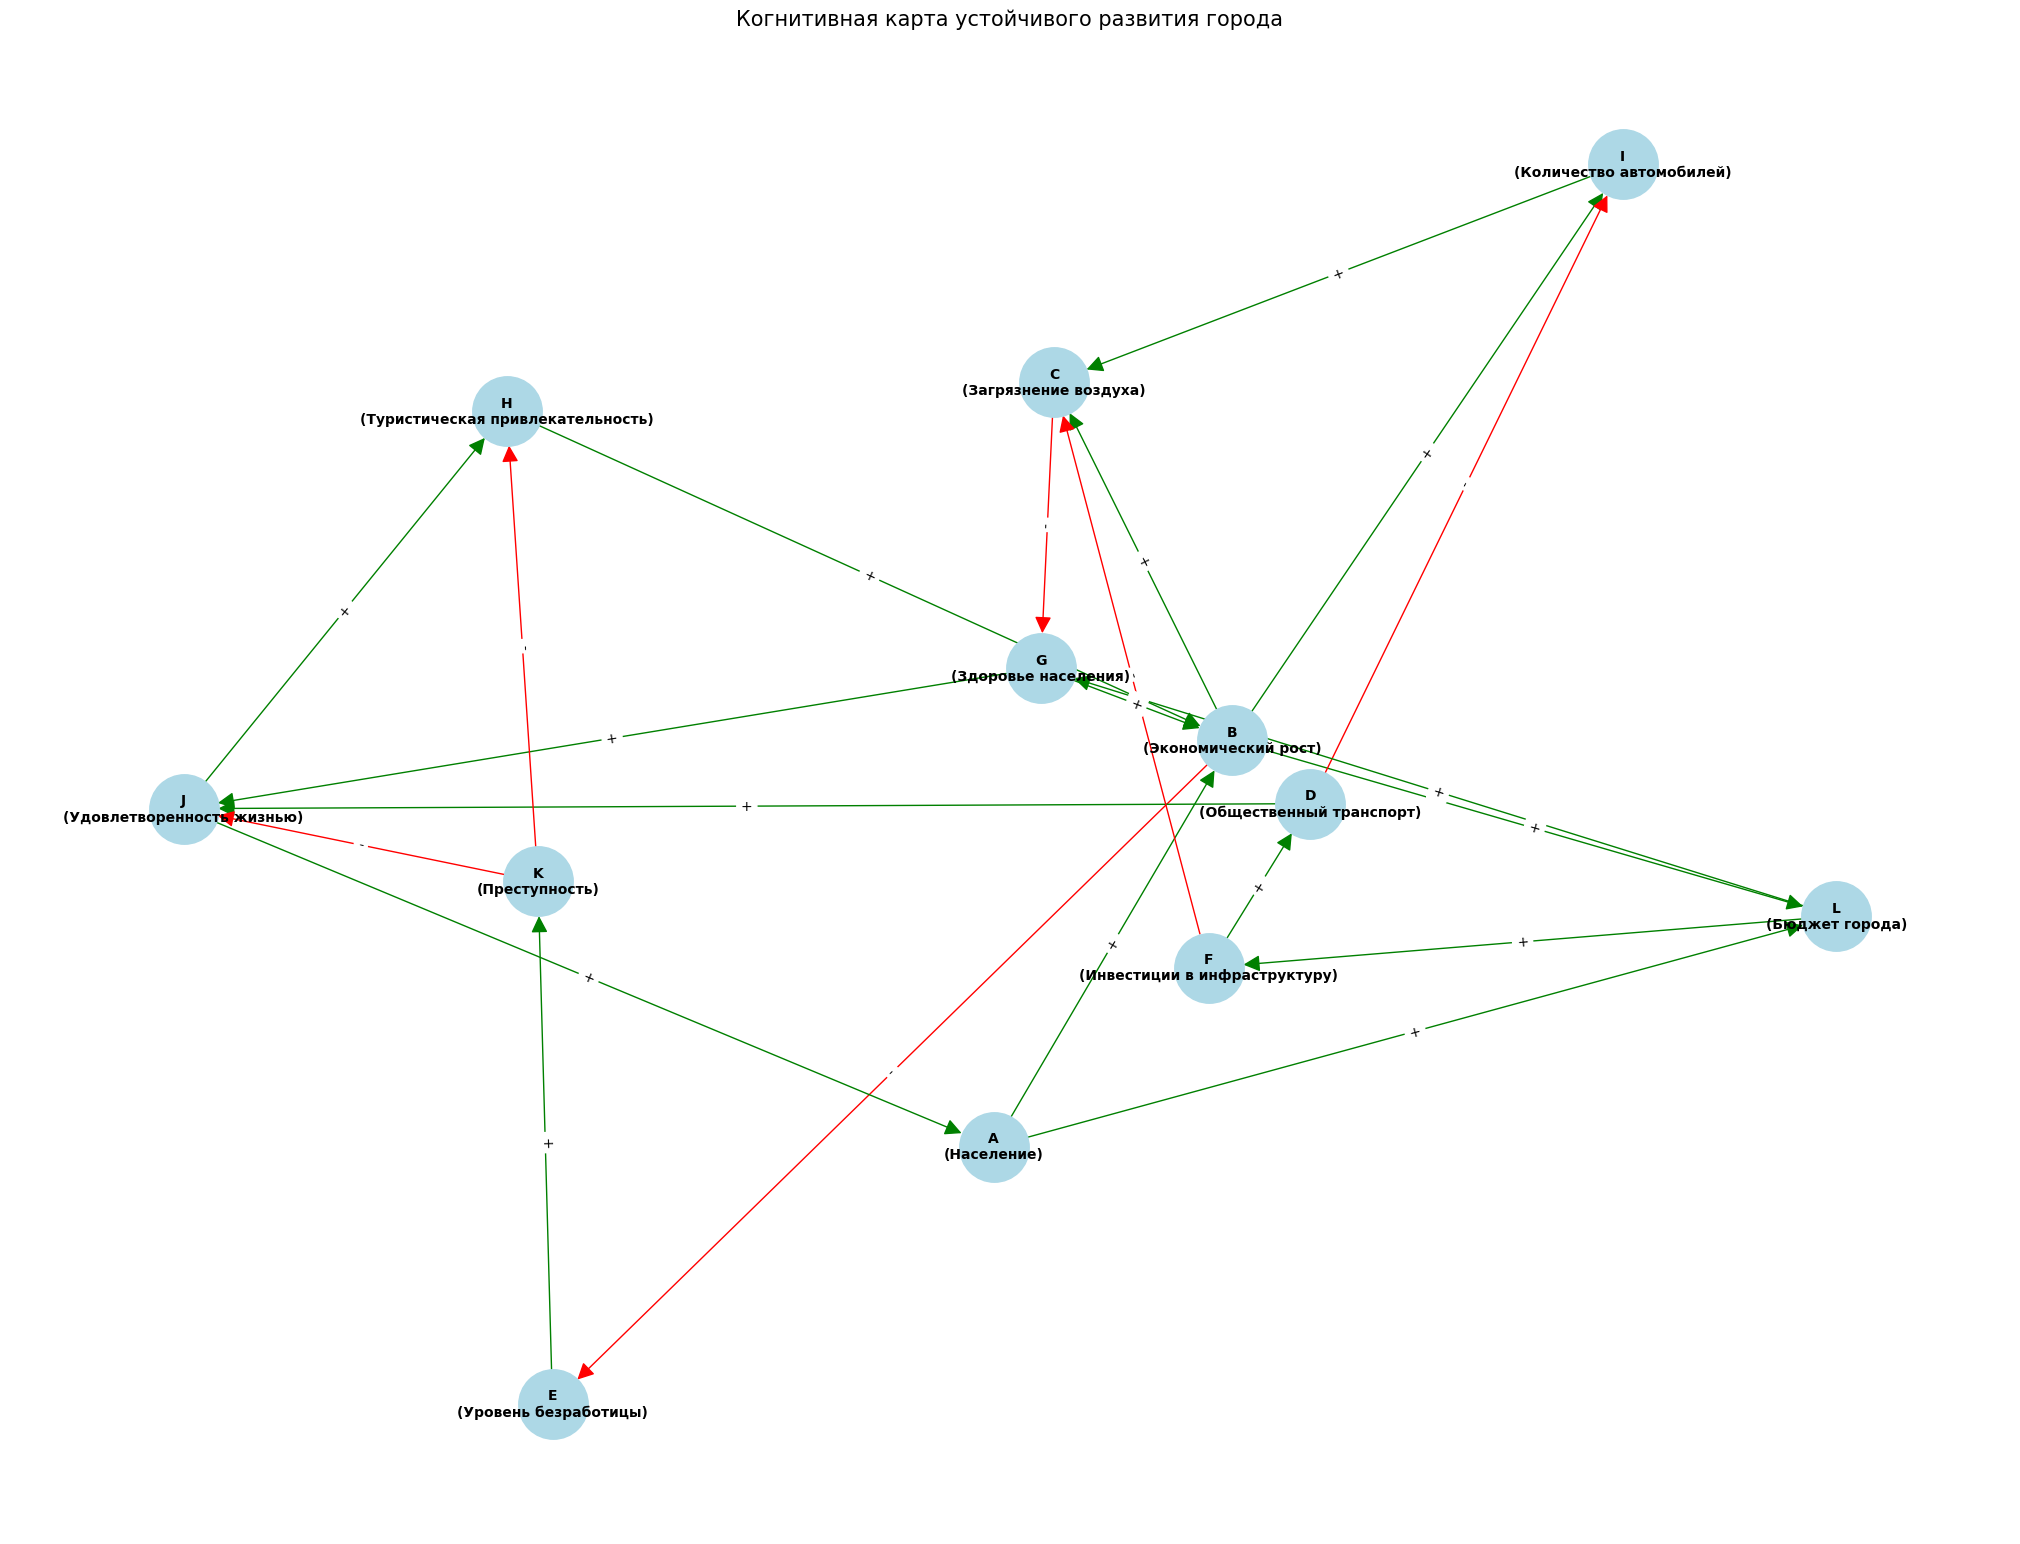


Динамика системы:
Шаг  A (Население)            B (Экономический рос     C (Загрязнение возду     D (Общественный тран     E (Уровень безработи     F (Инвестиции в инфр     G (Здоровье населени     H (Туристическая при     I (Количество автомо     J (Удовлетворенность     K (Преступность)         L (Бюджет города)        
0    1.500                    0.000                    0.000                    0.000                    0.000                    1.500                    0.000                    0.000                    0.000                    0.000                    0.000                    0.000                    
1    1.275                    1.200                    -1.200                   1.200                    0.000                    1.275                    0.000                    0.000                    0.000                    0.000                    0.000                    1.200                    
2    1.084                    2.040                    -1.080  

In [7]:
cm = CityCognitiveMap()

concepts = [
    ('A', 'Население'),
    ('B', 'Экономический рост'),
    ('C', 'Загрязнение воздуха'),
    ('D', 'Общественный транспорт'),
    ('E', 'Уровень безработицы'),
    ('F', 'Инвестиции в инфраструктуру'),
    ('G', 'Здоровье населения'),
    ('H', 'Туристическая привлекательность'),
    ('I', 'Количество автомобилей'),
    ('J', 'Удовлетворенность жизнью'),
    ('K', 'Преступность'),
    ('L', 'Бюджет города')
]

for symbol, name in concepts:
    cm.add_concept(symbol, name)

connections = [
    ('A', 'B', '+'), ('B', 'C', '+'), ('B', 'L', '+'),
    ('L', 'F', '+'), ('F', 'D', '+'), ('D', 'I', '-'),
    ('I', 'C', '+'), ('C', 'G', '-'), ('G', 'J', '+'),
    ('J', 'H', '+'), ('H', 'B', '+'), ('B', 'E', '-'),
    ('E', 'K', '+'), ('K', 'H', '-'), ('A', 'L', '+'),
    ('G', 'B', '+'), ('F', 'C', '-'), ('L', 'G', '+'),
    ('J', 'A', '+'), ('K', 'J', '-'), ('B', 'I', '+'),
    ('D', 'J', '+')
]

for src, tgt, sign in connections:
    cm.add_connection(src, tgt, sign)

cm.visualize()

history = cm.simulate_impact(
    initial_changes={'A': 1.5, 'F': 1.5},
    steps=8,
    damping=0.85
)

print("\nДинамика системы:")
headers = ["Шаг"] + [f"{symbol} ({cm.labels[symbol]})" for symbol in cm.concepts]
print("{:<5}".format("Шаг"), end="")
for h in headers[1:]:
    print("{:<25}".format(h[:20]), end="")
print()

for step, values in enumerate(history):
    print("{:<5}".format(step), end="")
    for symbol in cm.concepts:
        print("{:<25}".format(f"{values[symbol]:.3f}"), end="")
    print()